In [184]:
# project 3 python with diamonds
# https://www.kaggle.com/shivam2503/diamonds

In [185]:
import pandas as pd
df = pd.read_csv('diamonds.csv')
# data cleaning
df = df.drop(columns=['cut','color','clarity','id', 'table'])
print('NAs in each column (none) \n',df.isnull().sum()) # 0 NAs

NAs in each column (none) 
 carat    0
depth    0
price    0
x        0
y        0
z        0
dtype: int64


In [186]:
# data exploration
print('first 5 rows\n',df.head())
print('shape of the data: 53940 rows using 6 attributes\n',df.shape)
print('only using floats and ints\n',df.dtypes)
print('0 carat, 1 depth, price 2, x 3, y 4, z 5\n',df.iloc[:,0]) # 0 carat, 1 depth, 2 price, 3 x, 4 y, 5 z

first 5 rows
    carat  depth  price     x     y     z
0   0.23   61.5    326  3.95  3.98  2.43
1   0.21   59.8    326  3.89  3.84  2.31
2   0.23   56.9    327  4.05  4.07  2.31
3   0.29   62.4    334  4.20  4.23  2.63
4   0.31   63.3    335  4.34  4.35  2.75
shape of the data: 53940 rows using 6 attributes
 (53940, 6)
only using floats and ints
 carat    float64
depth    float64
price      int64
x        float64
y        float64
z        float64
dtype: object
0 carat, 1 depth, price 2, x 3, y 4, z 5
 0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64


In [187]:
print('min of each column\n', df.min())
print('max of each column\n', df.max())
print('mean of each column\n', df.mean())
print('we see a pretty wide range of prices and weights\n')

min of each column
 carat      0.2
depth     43.0
price    326.0
x          0.0
y          0.0
z          0.0
dtype: float64
max of each column
 carat        5.01
depth       79.00
price    18823.00
x           10.74
y           58.90
z           31.80
dtype: float64
mean of each column
 carat       0.797940
depth      61.749405
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64
we see a pretty wide range of prices and weights



<AxesSubplot:xlabel='carat'>

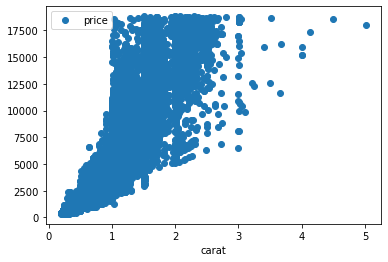

In [188]:
import seaborn as sb
df.plot(x='carat', y='price', style='o')

<AxesSubplot:xlabel='depth'>

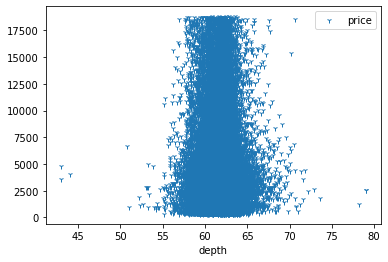

In [189]:
df.plot(x='depth', y='price', style='1')

<AxesSubplot:xlabel='x'>

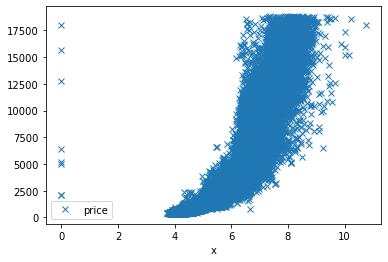

In [190]:
df.plot(x='x', y='price', style='x')

<AxesSubplot:xlabel='y'>

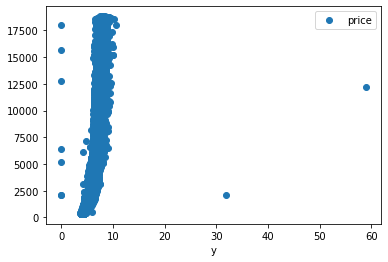

In [191]:
df.plot(x='y', y='price', style='o')

<AxesSubplot:xlabel='z'>

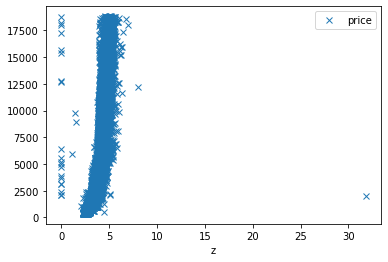

In [192]:
df.plot(x='z', y='price', style='x')

In [193]:
print('our plots show us that x and carat may be good predictors for the target price')

our plots show us that x and carat may be good predictors for the target price


In [194]:
# divide into train and test (80/20)
from sklearn.model_selection import train_test_split
X = df[['carat','x']] # carat and x are the predictors
y = df[['price']] # price is the target
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=1234)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(43152, 2)
(10788, 2)
(43152, 1)
(10788, 1)


intercept  [1846.92128682]
coefficients  [[10188.11667368 -1053.78142494]]
mse  2403946.117282148
corr  0.8519701115399014


<AxesSubplot:xlabel='price'>

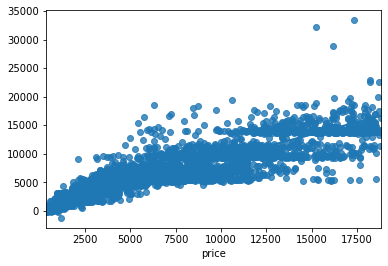

In [195]:
#linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(Xtrain, ytrain)
print('intercept ',linreg.intercept_)
print('coefficients ', linreg.coef_)

ypred = linreg.predict(Xtest)
from sklearn.metrics import mean_squared_error, r2_score
print('mse ',mean_squared_error(ytest,ypred))
print('corr ', r2_score(ytest,ypred))

sb.regplot(x=ytest, y=ypred)


In [196]:
# knn reg
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(Xtrain, ytrain)
knnypred = regressor.predict(Xtest)
from sklearn.metrics import mean_squared_error, r2_score
print('mse=', mean_squared_error(ytest, knnypred))
print('correlation=', r2_score(ytest, knnypred))

mse= 2702683.001740617
correlation= 0.8335745296392135


In [197]:
# we got a reasonably larger MSE value and about the same correlation value
# lets trying SCALING
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrainscaled = scaler.transform(Xtrain)
Xtestscaled = scaler.transform(Xtest)
regressor2 = KNeighborsRegressor(n_neighbors=3)
regressor2.fit(Xtrainscaled, ytrain)
knnypred2 = regressor2.predict(Xtestscaled)
print('mse ', mean_squared_error(ytest, knnypred2))
print('corr ', r2_score(ytest, knnypred2))
# scaling the data didnt give better results in this case

mse  2638613.2058666004
corr  0.8375198113860501


In [198]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=0)
clf.fit(Xtrain, ytrain)
dtpred = clf.predict(Xtest)
print('mse ', mean_squared_error(ytest, dtpred))
print('corr ', r2_score(ytest, dtpred))

mse  2602053.7339197192
corr  0.8397710659027593


In [199]:
### WHAT I DID
# selected the diamonds data set from my R project
# performed data cleaning to remove several columns and ensure that there are
#  no NAs
# performed data exploration through code to determine the shape of the data, 
#  data types, mins, maxes, and means of each column
# performed data exploration through graphs to determine which predictors we
#  should perform algorithms on with the price target
# performed linear regression knn, decision trees on price with predictors
#  carat and x to determine the correlation between them
### RESULTS ANALYSIS
# all 3 algorithms outputted very similar MSE and correlations
# the MSEs were all around 2.4 million and all the correlations were around 
# 0.845. the extremely high MSEs mean the data is widely dispersed but there
# is a lot of error in the models. a positive correlation of 0.84 indicates
# a strong positive correlation between price and the predictors carat (weight)
# and x (width) of the diamonds showing that wider and heavier diamonds are
# highly likely to be more expensive diamonds
### PERSONAL IMPRESSION
# I personally found machine learning in python to be more enjoyable than
# machine learning in R. This may be because python is a more popular
# programming language that I was very excited to get into because I don't have
# any experience in python prior to taking this class. I also found machine
# learning in python to be easier than in R simply because I found it easier to
# calculate the metrics and debug my code in python than in R/RStudio. 
# I generally feel like I got more out of machine learning in python than in R
# because I'm personally more interested in development outside of data science
# where python would probably be more commonly used than R. However, I still
# enjoyed using R and I think any developer should understand the basics of 
# machine learning in R so I have gained a lot of valuable knowledge from this
# course as a developer.